In [2]:
import pandas as pd

# Load the dataset
data_path = "../Dataset/ForestFire-Data.csv"  # Update path if needed
forest_fire_data = pd.read_csv(data_path)

# Rename columns for better clarity
forest_fire_data.columns = [
    "Serial_No", "State_UT", "Jan_2018_Jun_2018", "Nov_2018_Jun_2019", 
    "Nov_2019_Jun_2020", "Nov_2020_Jun_2021", "Nov_2021_Jun_2022", 
    "Nov_2022_Jun_2023"
]

# Drop redundant columns (e.g., Serial_No)
forest_fire_data = forest_fire_data.drop(columns=["Serial_No"])

# Display data info
print(forest_fire_data.info())
print(forest_fire_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   State_UT           37 non-null     object
 1   Jan_2018_Jun_2018  37 non-null     int64 
 2   Nov_2018_Jun_2019  37 non-null     int64 
 3   Nov_2019_Jun_2020  37 non-null     int64 
 4   Nov_2020_Jun_2021  37 non-null     int64 
 5   Nov_2021_Jun_2022  37 non-null     int64 
 6   Nov_2022_Jun_2023  37 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.1+ KB
None
                      State_UT  Jan_2018_Jun_2018  Nov_2018_Jun_2019   
0  Andaman and Nicobar Islands                  3                  6  \
1               Andhra Pradesh               1785               1748   
2            Arunachal Pradesh                491                926   
3                        Assam               1660               1940   
4                        Bihar                223           

In [3]:
# Define features: Fire incident counts
X = forest_fire_data.drop(columns=["State_UT"])

# Create a synthetic target: High or Low fire incidents
forest_fire_data["Average_Incidents"] = X.mean(axis=1)
median_incidents = forest_fire_data["Average_Incidents"].median()
y = (forest_fire_data["Average_Incidents"] > median_incidents).astype(int)

# Display target value counts
print(y.value_counts())


Average_Incidents
0    19
1    18
Name: count, dtype: int64


In [4]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check split data shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (29, 6)
X_test shape: (8, 6)
y_train shape: (29,)
y_test shape: (8,)


In [5]:
from sklearn.preprocessing import StandardScaler

# Scale the features for uniformity
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify scaling
print("Scaled X_train:\n", X_train_scaled[:5])


Scaled X_train:
 [[-0.19997046 -0.15551129 -0.05558176 -0.16468265 -0.10486115 -0.15646804]
 [-0.1800447  -0.12325108 -0.23054406 -0.2481881  -0.20021354  0.00519897]
 [-0.34005    -0.35492095 -0.36312113 -0.3462071  -0.35007978 -0.34046474]
 [-0.24027142 -0.28643873 -0.33823212 -0.18182546 -0.23206012 -0.20595064]
 [-0.33360784 -0.3503932  -0.35351052 -0.34357783 -0.34314847 -0.33439106]]


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {mse_lr}, R2 Score: {r2_lr}")


Linear Regression - MSE: 0.4172400185060543, R2 Score: -1.2252800986989563


In [15]:
from sklearn.svm import SVR

# Train Support Vector Machine model
svm_model = SVR()
svm_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate SVM model
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)
print(f"SVM - MSE: {mse_svm}, R2 Score: {r2_svm}")


SVM - MSE: 0.03175650962711443, R2 Score: 0.8306319486553897


In [16]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf}, R2 Score: {r2_rf}")


Random Forest - MSE: 0.0183375, R2 Score: 0.9022


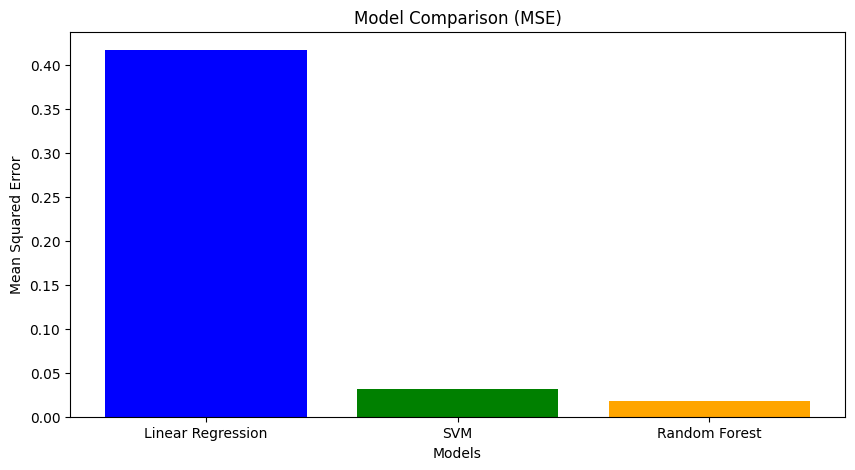

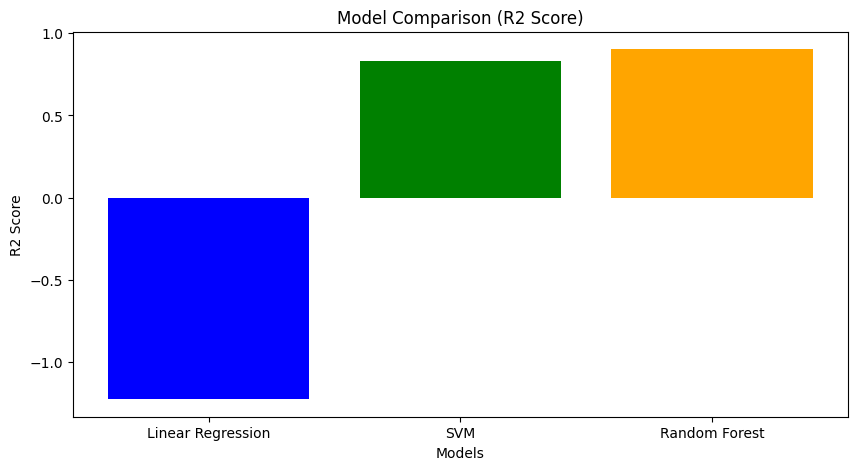

In [17]:
import matplotlib.pyplot as plt

# Data for visualization
models = ['Linear Regression', 'SVM', 'Random Forest']
mse_values = [mse_lr, mse_svm, mse_rf]
r2_values = [r2_lr, r2_svm, r2_rf]

# Plot MSE values
plt.figure(figsize=(10, 5))
plt.bar(models, mse_values, color=['blue', 'green', 'orange'])
plt.title('Model Comparison (MSE)')
plt.ylabel('Mean Squared Error')
plt.xlabel('Models')
plt.show()

# Plot R2 Score values
plt.figure(figsize=(10, 5))
plt.bar(models, r2_values, color=['blue', 'green', 'orange'])
plt.title('Model Comparison (R2 Score)')
plt.ylabel('R2 Score')
plt.xlabel('Models')
plt.show()


In [18]:
print("As Random Forest Has Lower MSE and Highest R2 Value Thus RF is the Best Suited Model for this Dataset")

As Random Forest Has Lower MSE and Highest R2 Value Thus RF is the Best Suited Model for this Dataset
